In [3]:
# from google.colab import drive
# drive.mount('/content/drive')
import os

In [4]:
os.chdir("/content/drive/MyDrive/cimerlastround")

In [5]:
import numpy as np
import pandas as pd

***Verileri Yükleme***

In [6]:
df = pd.read_csv("cimer.csv",index_col=0)
df.head(3)

,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1357833692475973638,1357833692475973638,2021-02-06 02:29:14 Türkiye Standart Saati,2021-02-06,02:29:14,300,840164962773454849,ozgeozgew,Özge Şah,NaN,Bir an evvel bulunur gereken cezayı alırsın um...,tr,[],[],[],0,0,0,"['nurcanserce', 'nurcansercetutuklansın', 'cim...",[],https://twitter.com/OzgeozgeW/status/135783369...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1357813090469961732,1357584744679170050,2021-02-06 01:07:22 Türkiye Standart Saati,2021-02-06,01:07:22,300,264991994,vatansever_dir,Hacı♡Abi🤳,NaN,@AkbankYatirimci #cimer #tmfs #tvf @TRombudsma...,tr,"[{'screen_name': 'trombudsman', 'name': 'kamu ...",[],[],0,0,0,"['cimer', 'tmfs', 'tvf']",[],https://twitter.com/vatansever_dir/status/1357...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'AkbankYatirimci', 'name': 'A...",NaN,NaN,NaN,NaN
1357807288141164544,1357768700443697154,2021-02-06 00:44:18 Türkiye Standart Saati,2021-02-06,00:44:18,300,1348215039166132225,sakirrr16,Sakirrr,NaN,@komiteler #cimer #soylu #emniyet #polis #ihba...,tr,[],[],[],0,0,0,"['cimer', 'soylu', 'emniyet', 'polis', 'ihbar'...",[],https://twitter.com/Sakirrr16/status/135780728...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'komiteler', 'name': 'Gençlik...",NaN,NaN,NaN,NaN


***#VERİ HAZIRLAMA & TEMİZLEME***

In [7]:
df.shape

(2496, 35)

In [8]:
#gereksiz kolonları kaldırdık
df.drop(['conversation_id','created_at','date','time','timezone','user_id','username','place','mentions','urls','photos','replies_count','retweets_count','likes_count','hashtags','cashtags','link','retweet','quote_url','video','thumbnail'
          ,'near','geo','source','user_rt_id','user_rt','retweet_id','reply_to','retweet_date','translate','trans_src','name','language','trans_dest'
          ], axis=1, inplace=True)

In [7]:
df

,tweet
id,
1357833692475973638,Bir an evvel bulunur gereken cezayı alırsın um...
1357813090469961732,@AkbankYatirimci #cimer #tmfs #tvf @TRombudsma...
1357807288141164544,@komiteler #cimer #soylu #emniyet #polis #ihba...
1357805109422526465,15 yıl sonra mı deşifre edebildiniz ? 2016'da ...
1357776976082309124,#VatanSavunmasınınSözleşmesiOlmaz #cimer #Rece...
...,...
1345031951305080833,@ibbBeyazmasa #2004057430 nolu #Cimer başvurum...
1344978481860538368,Biz anlamadık her halde bu karantinayı Turgutr...
1344976349560262656,@TurkcellHizmet O kadar haklıki ne güvenliğind...


In [9]:
#emojilerin kaldırılması
import re

# http://stackoverflow.com/a/13752628/6762004
RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)

def strip_emoji(text):
    return RE_EMOJI.sub(r'', text)
df["tweet"] = df.tweet.apply( lambda x : strip_emoji(x))
df

,tweet
id,
1357833692475973638,Bir an evvel bulunur gereken cezayı alırsın um...
1357813090469961732,@AkbankYatirimci #cimer #tmfs #tvf @TRombudsma...
1357807288141164544,@komiteler #cimer #soylu #emniyet #polis #ihba...
1357805109422526465,15 yıl sonra mı deşifre edebildiniz ? 2016'da ...
1357776976082309124,#VatanSavunmasınınSözleşmesiOlmaz #cimer #Rece...
...,...
1345031951305080833,@ibbBeyazmasa #2004057430 nolu #Cimer başvurum...
1344978481860538368,Biz anlamadık her halde bu karantinayı Turgutr...
1344976349560262656,@TurkcellHizmet O kadar haklıki ne güvenliğind...


In [10]:
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
  

nok_isaretleri = string.punctuation
#nltk kümesi etkisiz kelimeler kümesi:
etkisiz_kelimeler = stopwords.words('turkish')
#etkisiz kelimelere verimize uygun yeni kelimeler eklendi:
etkisiz_kelimeler.extend(["i̇çin","yavaş","saat","ahgdvltpet","böyle","güler","eden","https","hafta","lazım","zaman","hâlâ","üzerinden","merkoyu","lazımsa","oluyor","duyuralım","yapınız","içindeki","hesabıyla","hedef","beri","kaybımızı","adlı","sesimizi","edilmesi","yaptığınız",'bizim','sayın','herkes','size','yada','verilsin','geldi',"ministre","sahip","olmak","köpek","sizde","gereken","edelim","yazin","sürekli","çekinirsen","beni","olmaz","yeter","kendi","ilgili","oldu","tweet","istiyoruz","olduğu","umarım","tombalak","olmasa","sonra","için","bunu","hergün","soygunsa","aynı","üzere","sadece","elitkik","yüzyılın","kaynaklı","açık","veri̇lsi̇n","resmen","sayın","artik","bunlar","herkes","yada","hala","varsa","bizi","fatsamıza","lütfen","bana","size","bile","artık","şeyleri","buna","küçük","gibiler","koca","halde","verilsin","arkadaşlar","bizim","kimse","icin","yaptı","bize","herkese","arkadaslar","arasın","diger","olsun","piç","ger","gere","sen","bil","edecek","çe","büyük","al","sirita","yok","portuair","dah","dur","avec","değil","gör","yıl","mill","alt","olma","devam","merko","duyural","devlet","alır","diğer","yayaonlin","allah","arkadaş","olduk","başvuru","edilme","kadar","edilme","kalm","say","olan","iştiraki","ben","ministr","böyl","verip","yüzyıl","yapıyor","cimer","olur","olan","olt","yap","basvur","ara","şikayet","kadıköy","bir","demek","ar","l","sonr","de","iç", "ses","ols","biz","herk","kret","ne","di","var","bun","gip","olarak","ett","ediyor","vurg","yapt","ybuyuk","yakrediyaonlin","aolacıklamabılıyor","pour","sağlamak","ols","veril","zeng"])

def veri_temizleme(metin):
  #küçük harfe çevirmece:
  metin = metin.lower()
  #yeni satır karakteri boşluk ile değiştirmece:
  metin = metin.replace("\\n"," ")
  #kesme işareti ve sonrasındakileri kaldırmaca:
  metin = re.sub("'(\w+)", "", metin)
  #metin = re.sub("[",',',"]", "", metin)
  #sayıları kaldırmaca:
  metin = re.sub("[0-9]+", "", metin)
  metin = " ".join(i for i in metin.split() if not i.startswith('#')) # hashtagsleri temizleme
  metin = " ".join(i for i in metin.split() if not i.startswith('@')) # kullanıcı adı etiketlerini temizleme
  #noktalama işaretlerini kaldırmaca:
  metin = "".join(list(map(lambda x:x if x not in nok_isaretleri else " ", metin)))
  #etkisiz kelimeleri kaldırmaca:
  metin = " ".join([i for i in metin.split() if i not in etkisiz_kelimeler])
  #tek harfleri çıkarmaca:
  metin = " ".join([i for i in metin.split() if len(i) > 3 ])
  # # kaldırmaca:

    
  return metin
  
df['tweet'] = df['tweet'].apply(lambda x: veri_temizleme(x))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
df

,tweet
id,
1357833692475973638,evvel bulunur cezayı alırsın
1357813090469961732,petrol fonu uluslararası piyasalarda yükselirk...
1357807288141164544,bunları terörist ihbarıdır
1357805109422526465,deşifre edebildiniz usulsüzlüklerini yıldır ya...
1357776976082309124,vatan savunmasında enön safta çarpışan yiğitle...
...,...
1345031951305080833,nolu başvuruma sağlık ’den gelen cevapta belgr...
1344978481860538368,anlamadık karantinayı turgutreis herkez dışard...
1344976349560262656,haklıki güvenliğinden bahsediyorsunuz kontrol ...


In [12]:
#nan degerlerinin boşluk karakteri ile degistirilmesi
import numpy as np

df.tweet.replace('', np.nan, inplace=True)
df = df.dropna()
df.shape

(2298, 1)

In [13]:
df

,tweet
id,
1357833692475973638,evvel bulunur cezayı alırsın
1357813090469961732,petrol fonu uluslararası piyasalarda yükselirk...
1357807288141164544,bunları terörist ihbarıdır
1357805109422526465,deşifre edebildiniz usulsüzlüklerini yıldır ya...
1357776976082309124,vatan savunmasında enön safta çarpışan yiğitle...
...,...
1345031951305080833,nolu başvuruma sağlık ’den gelen cevapta belgr...
1344978481860538368,anlamadık karantinayı turgutreis herkez dışard...
1344976349560262656,haklıki güvenliğinden bahsediyorsunuz kontrol ...


***Tokenize işlemi***

In [14]:
df['temiz_token_veri'] = df['tweet'].apply(lambda x: x.split())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df

,tweet,temiz_token_veri
id,,
1357833692475973638,evvel bulunur cezayı alırsın,"[evvel, bulunur, cezayı, alırsın]"
1357813090469961732,petrol fonu uluslararası piyasalarda yükselirk...,"[petrol, fonu, uluslararası, piyasalarda, yüks..."
1357807288141164544,bunları terörist ihbarıdır,"[bunları, terörist, ihbarıdır]"
1357805109422526465,deşifre edebildiniz usulsüzlüklerini yıldır ya...,"[deşifre, edebildiniz, usulsüzlüklerini, yıldı..."
1357776976082309124,vatan savunmasında enön safta çarpışan yiğitle...,"[vatan, savunmasında, enön, safta, çarpışan, y..."
...,...,...
1345031951305080833,nolu başvuruma sağlık ’den gelen cevapta belgr...,"[nolu, başvuruma, sağlık, ’den, gelen, cevapta..."
1344978481860538368,anlamadık karantinayı turgutreis herkez dışard...,"[anlamadık, karantinayı, turgutreis, herkez, d..."
1344976349560262656,haklıki güvenliğinden bahsediyorsunuz kontrol ...,"[haklıki, güvenliğinden, bahsediyorsunuz, kont..."


***# LDA MODEL***

---



In [16]:
pip install pyLDAvis

     |████████████████████████████████| 1.7MB 5.2MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.1.0-py2.py3-none-any.whl size=136708 sha256=2c193b1cab725ab5ea73899551ae3ccc01adbd3a57a4decc861f81aefc7bcf59
  Stored in directory: /root/.cache/pip/wheels/d1/e7/d3/8f4efa7ff8817ca49a11b1271f9fb40ba9774a56d11342db65
Successfully built pyLDAvis


In [17]:
import gensim
import pyLDAvis.gensim #lda figürsel gösterim için

In [18]:
#kelime listesi
token_metin = df['temiz_token_veri']
kelime_listesi = gensim.corpora.Dictionary(token_metin)

#kelime listesi filtreleme
kelime_listesi.filter_extremes(no_below=1, no_above=0.7)

In [19]:
#terim vektörleştirme
dokuman_terim_matrisi = [kelime_listesi.doc2bow(terim) for terim in token_metin]


In [20]:
#lda model
lda_model = gensim.models.ldamodel.LdaModel(corpus= dokuman_terim_matrisi,
                                            id2word = kelime_listesi,
                                            num_topics=8,
                                            passes = 15)
lda_model.save('mOdel.gensim')

Görüntülenen çıkış son 5000 satıra kısaltıldı.
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * l

In [21]:
#konular içinde en fazla olan kelimeler
konular = lda_model.print_topics(num_words=5)

for konu in konular:
  print(konu)

(0, '0.069*"krediverilsin" + 0.069*"kredi̇i̇sti̇yoruz" + 0.069*"yakrediyaonline" + 0.069*"yayaonline" + 0.044*"onaylama"')
(1, '0.005*"bilgin" + 0.005*"seyirci" + 0.004*"şüphe" + 0.004*"kalma" + 0.004*"manipülasyona"')
(2, '0.012*"mağdur" + 0.009*"hastası" + 0.008*"milyon" + 0.008*"varlık" + 0.008*"aktarılan"')
(3, '0.009*"yetkilileri" + 0.009*"karşılamalı" + 0.005*"patron" + 0.004*"benim" + 0.004*"satıyor"')
(4, '0.006*"kargo" + 0.006*"mağdur" + 0.004*"cimere" + 0.003*"dıyor" + 0.003*"imza"')
(5, '0.004*"lira" + 0.003*"usulsüzlüklerini" + 0.003*"yoksa" + 0.003*"oyuna" + 0.003*"yere"')
(6, '0.093*"kredi" + 0.027*"öğrenciler" + 0.027*"kazanmış" + 0.027*"üniversiteyi" + 0.027*"eşitlik"')
(7, '0.011*"soygun" + 0.006*"çözüm" + 0.005*"veejdywg" + 0.004*"etmek" + 0.004*"kullanamıyoruz"')


In [22]:
from gensim.models import CoherenceModel
konu_sayisi_aralik_listesi = range(6,20,3)

In [23]:
tutarlilik_skorlar_listesi = list()
konu_sayisi_listesi = list()

for konu_sayisi in konu_sayisi_aralik_listesi:
  lda_model = gensim.models.ldamodel.LdaModel(corpus = dokuman_terim_matrisi,
                                              id2word = kelime_listesi,
                                              num_topics = konu_sayisi,
                                              passes = 10)
  tutarlilik_model_lda = CoherenceModel(model = lda_model, texts=token_metin,
                                        dictionary = kelime_listesi, coherence= 'c_v')
  gecici_tutarlilik_skoru_lda = tutarlilik_model_lda.get_coherence()
  tutarlilik_skorlar_listesi.append(gecici_tutarlilik_skoru_lda)
  konu_sayisi_listesi.append(konu_sayisi)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * l

***Tutarlılık Skoru***

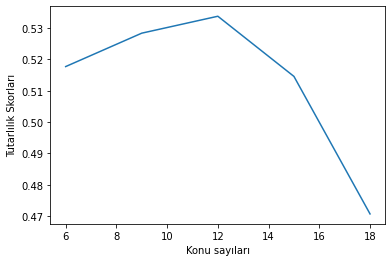

In [24]:
import matplotlib.pyplot as plt

plt.plot(konu_sayisi_listesi , tutarlilik_skorlar_listesi, "-"),
plt.xlabel("Konu sayıları")
plt.ylabel("Tutarlılık Skorları")

plt.show()

In [25]:
konular = lda_model.print_topics(num_words=7)
konular = sorted(konular, key = lambda x: x[0])
for konu in konular:
  print(konu)

(0, '0.016*"hissesini" + 0.014*"dolandırıcıyı" + 0.013*"bilinen" + 0.012*"kötüleyen" + 0.012*"bilinçli" + 0.012*"gösteren" + 0.011*"soygun"')
(1, '0.013*"sorun" + 0.010*"atacağım" + 0.010*"dendi" + 0.010*"bvuvxqce" + 0.009*"kafi̇rsa" + 0.008*"internet" + 0.008*"türktelekom"')
(2, '0.012*"fatsa" + 0.009*"yolu" + 0.008*"bi̇lmi̇yorum" + 0.008*"çevre" + 0.007*"cumhurbaşkanım" + 0.006*"rterdogan" + 0.006*"bakanım"')
(3, '0.145*"kredi̇i̇sti̇yoruz" + 0.145*"yakrediyaonline" + 0.145*"krediverilsin" + 0.145*"yayaonline" + 0.004*"soygun" + 0.004*"denetleme" + 0.002*"olacak"')
(4, '0.009*"kargo" + 0.007*"para" + 0.006*"çözüm" + 0.006*"çıkış" + 0.006*"dıyor" + 0.006*"manipülasyon" + 0.006*"fahiş"')
(5, '0.010*"seyirci" + 0.009*"şüphe" + 0.009*"manipülasyona" + 0.009*"kalma" + 0.009*"bilgin" + 0.008*"devletten" + 0.008*"hırsızlar"')
(6, '0.145*"kredi" + 0.047*"eşitlik" + 0.043*"üniversiteyi" + 0.043*"öğrenciler" + 0.043*"kazanmış" + 0.043*"verilip" + 0.043*"öğrencilere"')
(7, '0.008*"ediyorlar" + 0

In [ ]:

def dominant_topic(ldamodel,corpus,content):
     #Function to find the dominant topic in each query
     sent_topics_df = pd.DataFrame() 
     # Get main topic in each query
     for i, row in enumerate(ldamodel[corpus]):
         row = sorted(row, key=lambda x: (x[1]), reverse=True)
         # Get the Dominant topic, Perc Contribution and Keywords for each query
         for j, (topic_num, prop_topic) in enumerate(row):
             if j == 0:  # =&gt; dominant topic
                 wp = ldamodel.show_topic(topic_num,topn=30)
                 topic_keywords = ", ".join([word for word, prop in wp])
                 sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
             else:
                 break
     sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
     contents = pd.Series(content)#noisy data
     sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
     return(sent_topics_df)
df_dominant_topic = dominant_topic(ldamodel=lda_model, corpus=dokuman_terim_matrisi, content=df['tweet']) 
df_dominant_topic.head(10)

# ***Görselleştirme***

---



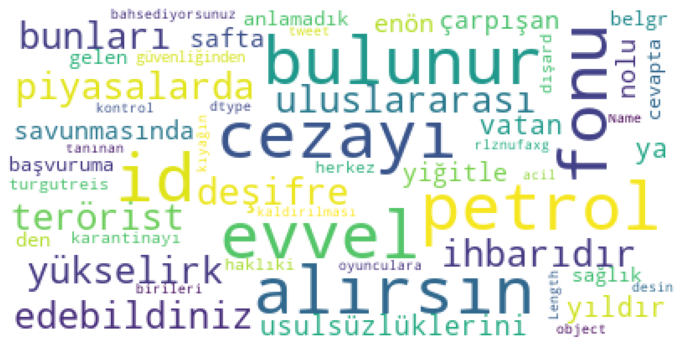

In [26]:
import matplotlib as mpl
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
mpl.rcParams['figure.figsize']=(12.0,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=500,
                          max_font_size=40, 
                          random_state=100
                         ).generate(str(df['tweet']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

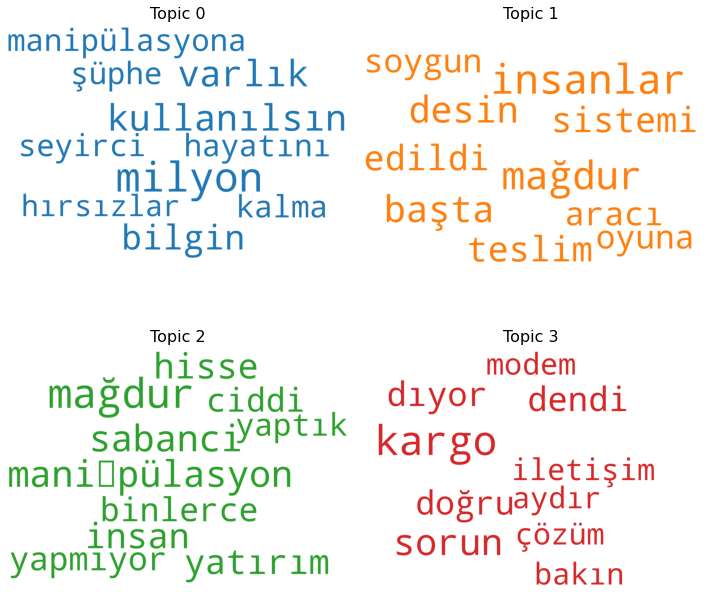

In [27]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


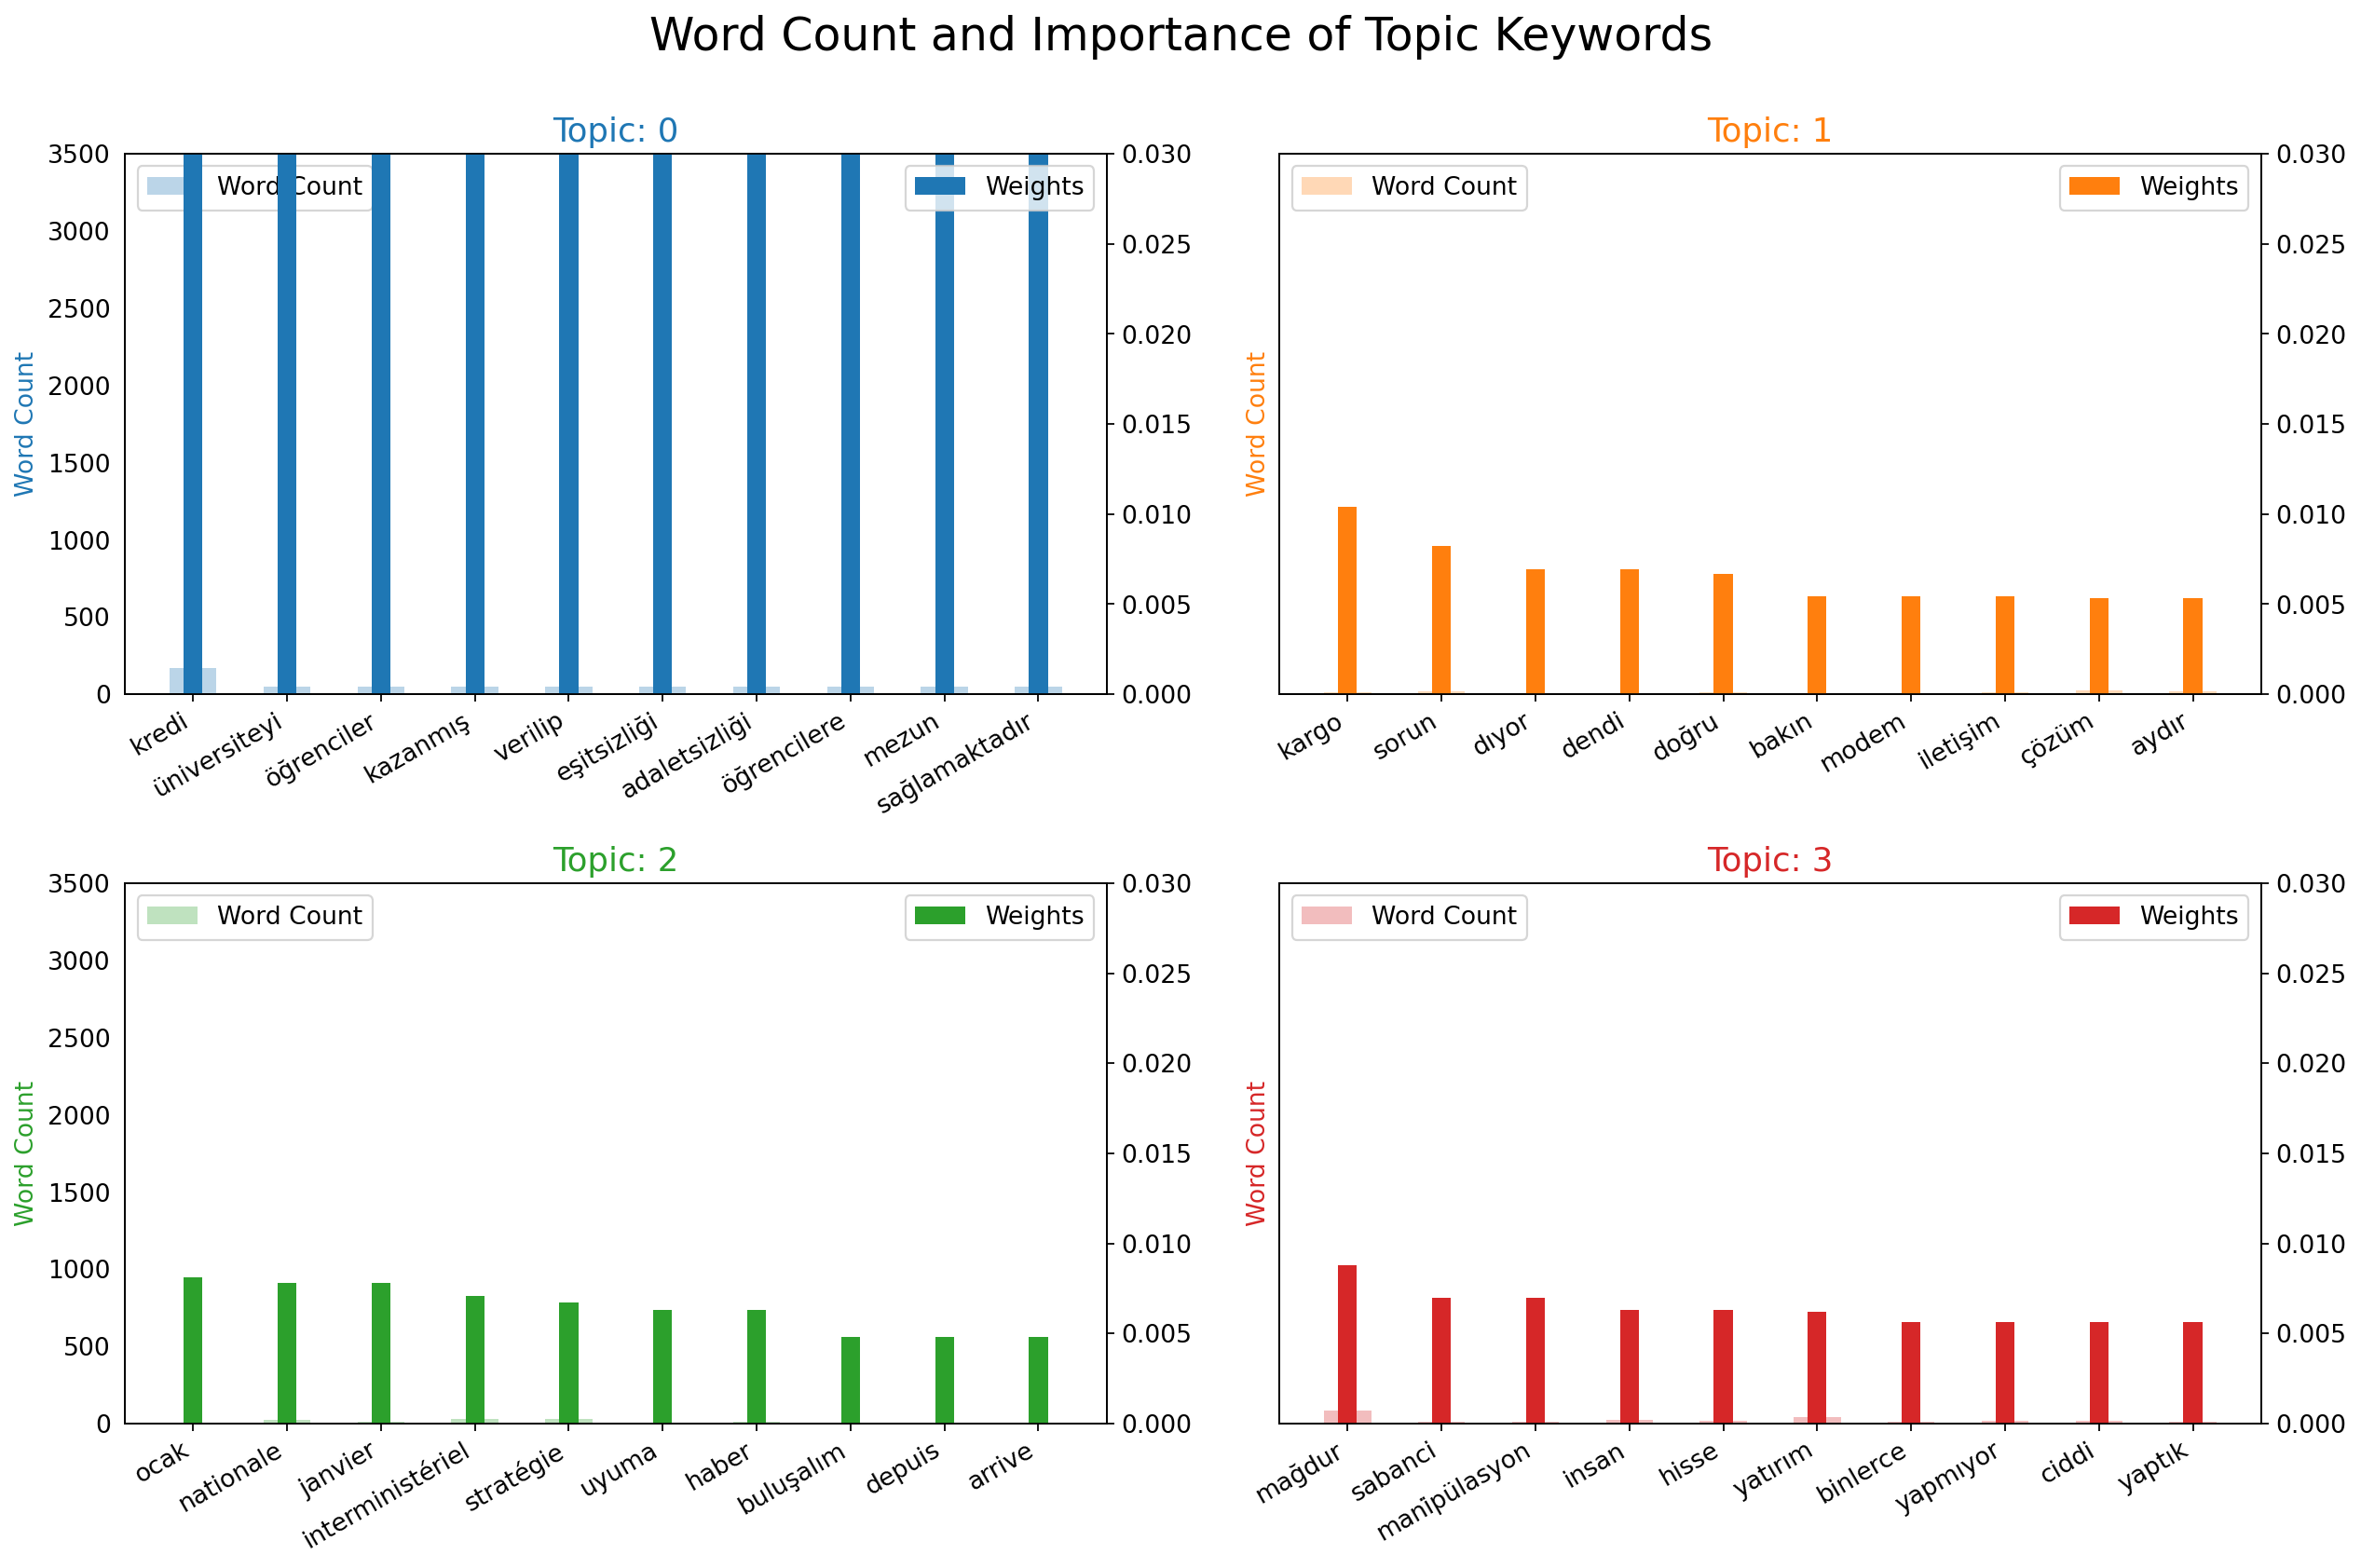

In [39]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in token_metin for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()